In [1]:
import os
import argparse
import numpy as np
from mcRBM import mcRBM

Matplotlib created a temporary cache directory at /tmp/matplotlib-o410h32v because the default path (/teamspace/studios/this_studio/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
root_dir = '/teamspace/studios/this_studio/mouse-sleep-analysis/configuration_files/'
expFile = 'exp_details'
modelFile = 'input_configuration'

In [3]:
model = mcRBM(root_dir, expFile, modelFile, 0)

## Load experiment data

In [4]:
model.loadData()

('initial size: ', (5410, 10))


## Trim for gpu

In [5]:
model.d, model.obsKeys, model.epochTime = model.dpp.trimForGPU(model.d, model.obsKeys, 
                                                               model.epochTime, model.batch_size)

In [6]:
np.savez(model.saveDir + '/init_data.npz', data=model.d, obsKeys=model.obsKeys, epochTime=model.epochTime)

## Subsetting and scaling

In [7]:
model.d, model.obsKeys, model.dMean, model.dStd, model.dMinRow, model.dMaxRow, model.dMin, model.dMax = \
    model.dpp.preprocAndScaleData(model.d, model.obsKeys, model.logFlag, model.meanSubtructionFlag, model.scaleFlag,
                                  model.scaling, model.doPCA, model.whitenFlag, model.rescaleFlag, model.rescaling,
                                  'minmaxFileInit', model.saveDir)

Scaling...


('visible size: ', (5120, 10))
('num_batches: ', 5)
Epoch 0
VF: 3.16e+00, DVF: 7.47e-02, FH: 3.32e+00, DFH: 0.00e+00, bias_cov: 6.63e+00, Dbias_cov: 2.99e-05, bias_vis: 4.54e-03, Dbias_vis: 9.12e-04, wm: 4.95e-01, Dwm: 3.90e-03, bm: 6.32e+00, Dbm: 7.88e-05, step: 1.05e-02, rej: 5.90e-02


/teamspace/studios/this_studio/mouse-sleep-analysis/mcRBM.py:475: RuntimeWarning: overflow encountered in cast
  normdata = cmt.CUDAMatrix(np.array(np.empty((num_vis, self.batch_size)), dtype=np.float32, order='F'))  # VxP
/teamspace/studios/this_studio/mouse-sleep-analysis/mcRBM.py:476: RuntimeWarning: overflow encountered in cast
  negdataini = cmt.CUDAMatrix(np.array(np.empty((num_vis, self.batch_size)), dtype=np.float32, order='F'))  # VxP
/teamspace/studios/this_studio/mouse-sleep-analysis/mcRBM.py:477: RuntimeWarning: overflow encountered in cast
  feat = cmt.CUDAMatrix(np.array(np.empty((self.num_fac, self.batch_size)), dtype=np.float32, order='F'))
/teamspace/studios/this_studio/mouse-sleep-analysis/mcRBM.py:478: RuntimeWarning: overflow encountered in cast
  featsq = cmt.CUDAMatrix(np.array(np.empty((self.num_fac, self.batch_size)), dtype=np.float32, order='F'))


Epoch 1
VF: 3.16e+00, DVF: 6.31e-02, FH: 3.32e+00, DFH: 0.00e+00, bias_cov: 6.63e+00, Dbias_cov: 1.64e-05, bias_vis: 9.08e-03, Dbias_vis: 9.09e-04, wm: 4.99e-01, Dwm: 4.01e-03, bm: 6.32e+00, Dbm: 8.51e-05, step: 1.10e-02, rej: 3.49e-02
Epoch 2
VF: 3.16e+00, DVF: 5.07e-02, FH: 3.32e+00, DFH: 0.00e+00, bias_cov: 6.63e+00, Dbias_cov: 1.13e-05, bias_vis: 1.36e-02, Dbias_vis: 9.05e-04, wm: 5.03e-01, Dwm: 4.11e-03, bm: 6.32e+00, Dbm: 9.30e-05, step: 1.16e-02, rej: 2.06e-02
Epoch 3
VF: 3.16e+00, DVF: 4.06e-02, FH: 3.32e+00, DFH: 0.00e+00, bias_cov: 6.63e+00, Dbias_cov: 1.13e-05, bias_vis: 1.81e-02, Dbias_vis: 9.02e-04, wm: 5.09e-01, Dwm: 4.23e-03, bm: 6.32e+00, Dbm: 1.02e-04, step: 1.22e-02, rej: 1.22e-02
Epoch 4
VF: 3.16e+00, DVF: 3.26e-02, FH: 3.32e+00, DFH: 0.00e+00, bias_cov: 6.63e+00, Dbias_cov: 1.19e-05, bias_vis: 2.26e-02, Dbias_vis: 9.05e-04, wm: 5.16e-01, Dwm: 4.38e-03, bm: 6.32e+00, Dbm: 1.13e-04, step: 1.28e-02, rej: 7.18e-03
Epoch 5
VF: 3.17e+00, DVF: 2.75e-02, FH: 3.32e+00, DFH: 

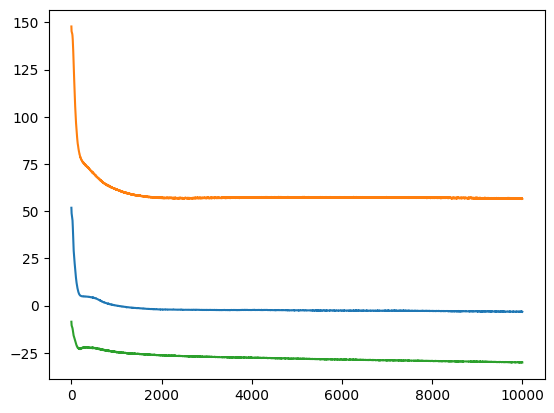

In [8]:
model.train()